In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("online-shoppers-intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(df["Month"])
le.classes_
df["Month"]=le.transform(df["Month"])

In [6]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(df["VisitorType"])
le.classes_
df["VisitorType"]=le.transform(df["VisitorType"])

In [7]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(df["Weekend"])
le.classes_
df["Weekend"]=le.transform(df["Weekend"])

In [8]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(df["Revenue"])
le.classes_
df["Revenue"]=le.transform(df["Revenue"])

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

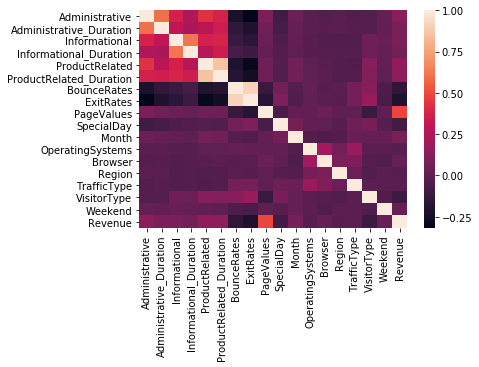

In [10]:
sns.heatmap(df.corr())

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


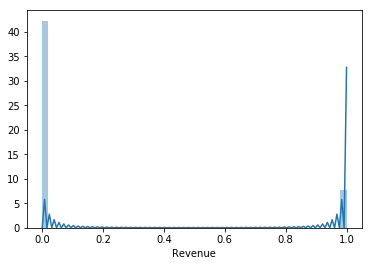

In [11]:
sns.distplot(df['Revenue'])

In [12]:
y=df[["Revenue"]]
x=df[["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration","BounceRates","ExitRates","PageValues","SpecialDay","Month","OperatingSystems","Browser","Region","TrafficType","VisitorType","Weekend"]]

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
predicted= model.predict(x_test)
print("Predicted Value:", predicted)

Predicted Value: [0 0 0 ... 0 1 1]


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,predicted))

Accuracy: 0.8410638987998702


In [16]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
kf.get_n_splits(x)
print(kf)
KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)

KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [ 6165  6166  6167 ... 12327 12328 12329] TEST: [   0    1    2 ... 6162 6163 6164]
TRAIN: [   0    1    2 ... 6162 6163 6164] TEST: [ 6165  6166  6167 ... 12327 12328 12329]


In [17]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,x_train,y_train, scoring='accuracy', cv=10)
print(scores)
print (scores.mean())

[0.8488121  0.8572973  0.85945946 0.84540541 0.84648649 0.82918919
 0.85822511 0.8474026  0.83874459 0.85714286]
0.8488165084385388


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 